<a href="https://colab.research.google.com/github/ARD7989/AN-INTEGRATED-APPROACH-FOR-THE-DETECTION-OF-RETINAL-DISEASES-USING-CNN/blob/main/CUP_TO_DISC_RATIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from scipy import signal
import cv2
import sys
import pandas as pd
import os
import xlrd
import math
from scipy import signal
import glob
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
def drishti_gs1(db):
  Exp1 = []
  Exp2 = []
  Exp3 = []
  Avg = []
  file_name = []

  set_path = os.path.join(db,'Drishti-GS_files','Drishti-GS_files','Test')
  images = os.path.join


In [ ]:

def segment(image):
    image = image[400:1400,500:1600,:]


    b,g,r = cv2.split(image)

    print("\n \n Green Channeling")
    cv2_imshow(g)

    print("\n \n Red channeling")
    cv2_imshow(r)

    g = clahe.apply(g)
    print("\n \n CLAHE of Green Channeling")
    cv2_imshow(g)


    r = clahe.apply(r)
    print("\n \n CLAHE of RED Channeling")
    cv2_imshow(r)


    M = 100
    filter = signal.gaussian(M, std=6)
    STDf = filter.std()


    Ar = r - r.mean() - r.std()
    Mr = Ar.mean()
    SDr = Ar.std()
    Thr = 0.5*M - STDf - Ar.std()

    M = 30
    filter_cup = signal.gaussian(M,std=6)
    STDf = filter_cup.std()

    Ag = g - g.mean() - g.std()
    Mg = Ag.mean()
    SDg = Ag.std()
    Thg = 0.5*M +2*STDf + 2*SDg + Mg



    hist,bins = np.histogram(Ag.ravel(),256,[0,256])
    histr,binsr = np.histogram(Ar.ravel(),256,[0,256])



    smooth_hist_g=np.convolve(filter,hist)
    smooth_hist_r=np.convolve(filter_cup,histr)



    r,c = Ag.shape
    Od = np.zeros(shape=(r,c))
    Oc = np.zeros(shape=(r,c))


    for i in range(1,r):
        for j in range(1,c):
            if Ar[i,j]>Thr:
                Od[i,j]=255
            else:
                Od[i,j]=0
    for i in range(1,r):
        for j in range(1,c):

            if Ag[i,j]>Thg:
                Oc[i,j]=255
            else:
                Oc[i,j]=0

    plt.imsave('disk.png',Od)
    plt.imsave('cup.png',Oc)


    disk = cv2.imread('/content/disk.png')
    print("\n \n Disk")
    cv2_imshow(disk)

    cup = cv2.imread('/content/cup.png')
    print("\n \n Cup")
    cv2_imshow(cup)



In [ ]:
def cdr(cup,disk):

    R1 = cv2.morphologyEx(cup, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations = 1)
    r1 = cv2.morphologyEx(R1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7)), iterations = 1)
    R2 = cv2.morphologyEx(r1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(19,19)), iterations = 1)
    r2 = cv2.morphologyEx(R2, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(29,29)), iterations = 1)
    R3 = cv2.morphologyEx(r2, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(39,39)), iterations = 1)
    r3 = cv2.morphologyEx(R3, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(47,47)), iterations = 1)
    img = r3
    print("\n \n morphology of cup")
    cv2_imshow(img)


    ret,thresh = cv2.threshold(img,127,255,0)

    im_bw = cv2.cvtColor(thresh, cv2.COLOR_RGB2GRAY)



    contours,hierarchy = cv2.findContours(im_bw, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cup_diameter = 0
    largest_area = 0
    el_cup = contours[0]
    if len(contours) != 0:
        for i in range(len(contours)):
            if len(contours[i]) >= 2:
                area = cv2.contourArea(contours[i])
                if (area>largest_area):
                    largest_area=area
                    index = i
                    el_cup = cv2.fitEllipse(contours[i])

    cv2.ellipse(img,el_cup,(140,60,150),3)
    x,y,w,h = cv2.boundingRect(contours[index])
    cup_diameter = max(w,h)

    print("\n \n Countour Of CUP")
    cv2_imshow(img)



    R1 = cv2.morphologyEx(disk, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations = 1)
    r1 = cv2.morphologyEx(R1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7)), iterations = 1)
    R2 = cv2.morphologyEx(r1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(19,19)), iterations = 1)
    r2 = cv2.morphologyEx(R2, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(29,29)), iterations = 1)
    R3 = cv2.morphologyEx(r2, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(39,39)), iterations = 1)
    r3 = cv2.morphologyEx(R3, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(47,47)), iterations = 1)
    img2 = r3

    print("\n \n morphology of disk")
    cv2_imshow(img2)

    ret,thresh = cv2.threshold(img2,127,255,0)
    print("\n \n cv2 threshold")
    cv2_imshow(img2)
    im_bw = cv2.cvtColor(thresh, cv2.COLOR_RGB2GRAY)
    contours,hierarchy = cv2.findContours(im_bw, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    disk_diameter = 0
    largest_area = 0
    el_disk = contours[0]
    if len(contours) != 0:
          for i in range(len(contours)):
            if len(contours[i]) >= 2:
                area = cv2.contourArea(contours[i])
                if (area>largest_area):
                    largest_area=area
                    index = i
                    el_disk = cv2.fitEllipse(contours[i])


    cv2.ellipse(img2,el_disk,(140,60,150),3)
    x,y,w,h = cv2.boundingRect(contours[index])
    disk_diameter = max(w,h)

    print("\n \n Contours of disk")
    cv2_imshow(img2)

    cdr = cup_diameter/disk_diameter
    return cdr


 
 Green Channeling


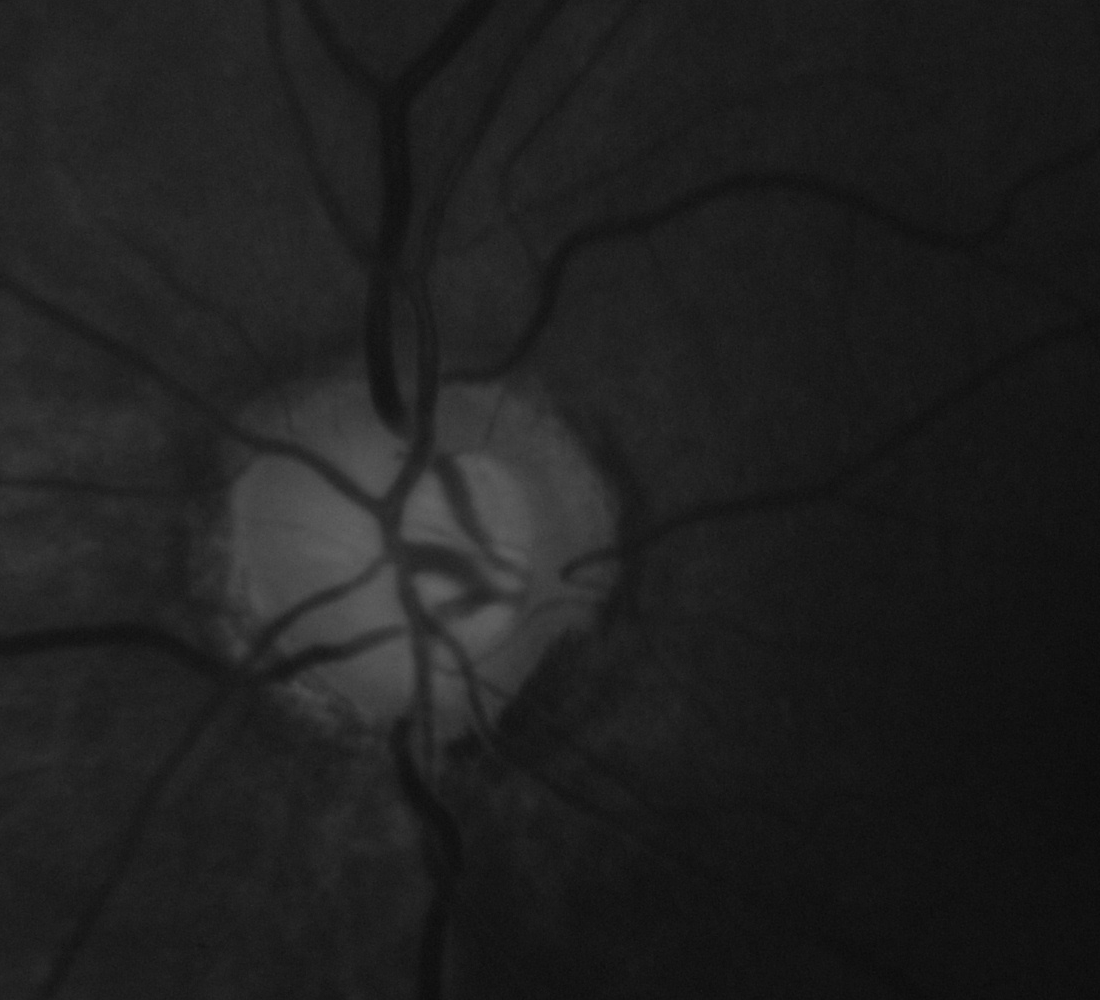


 
 Red channeling


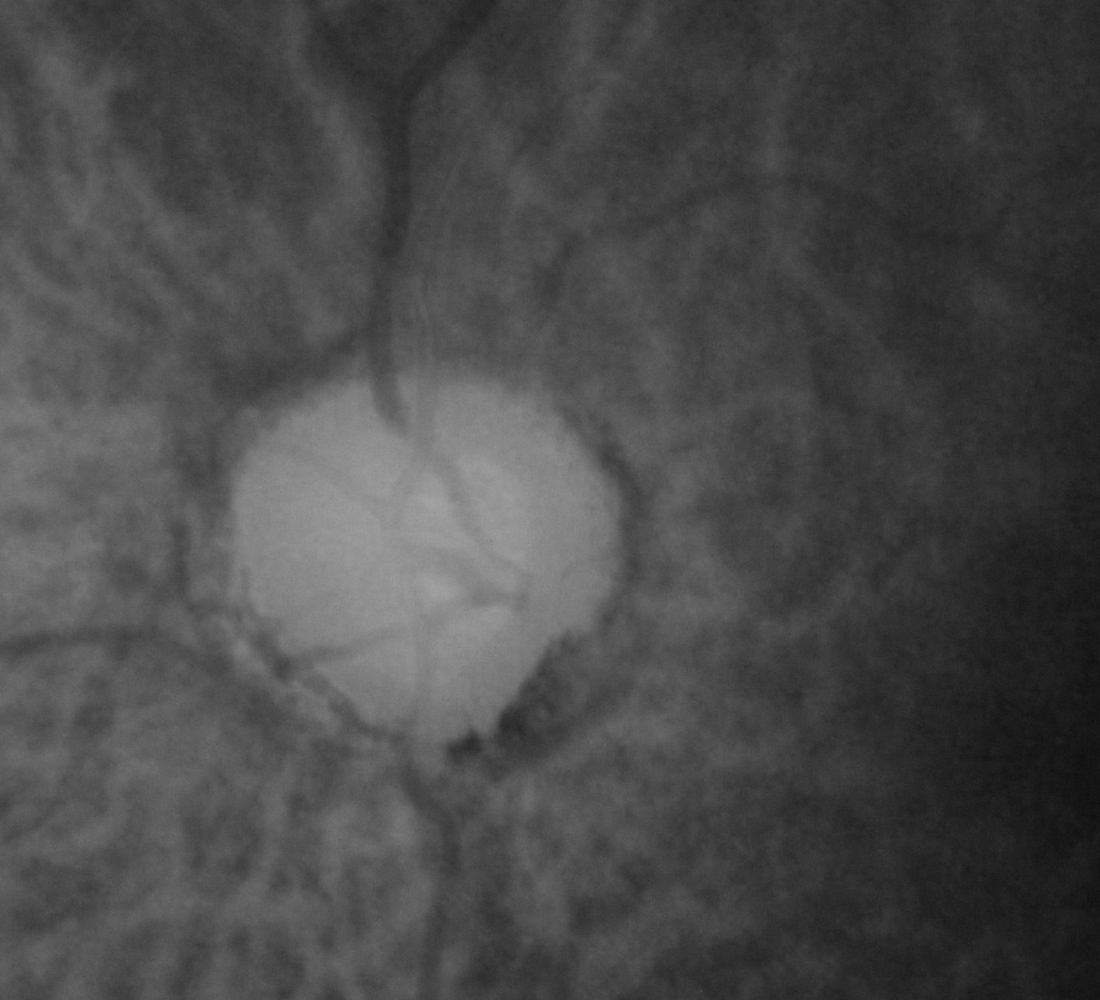


 
 CLAHE of Green Channeling


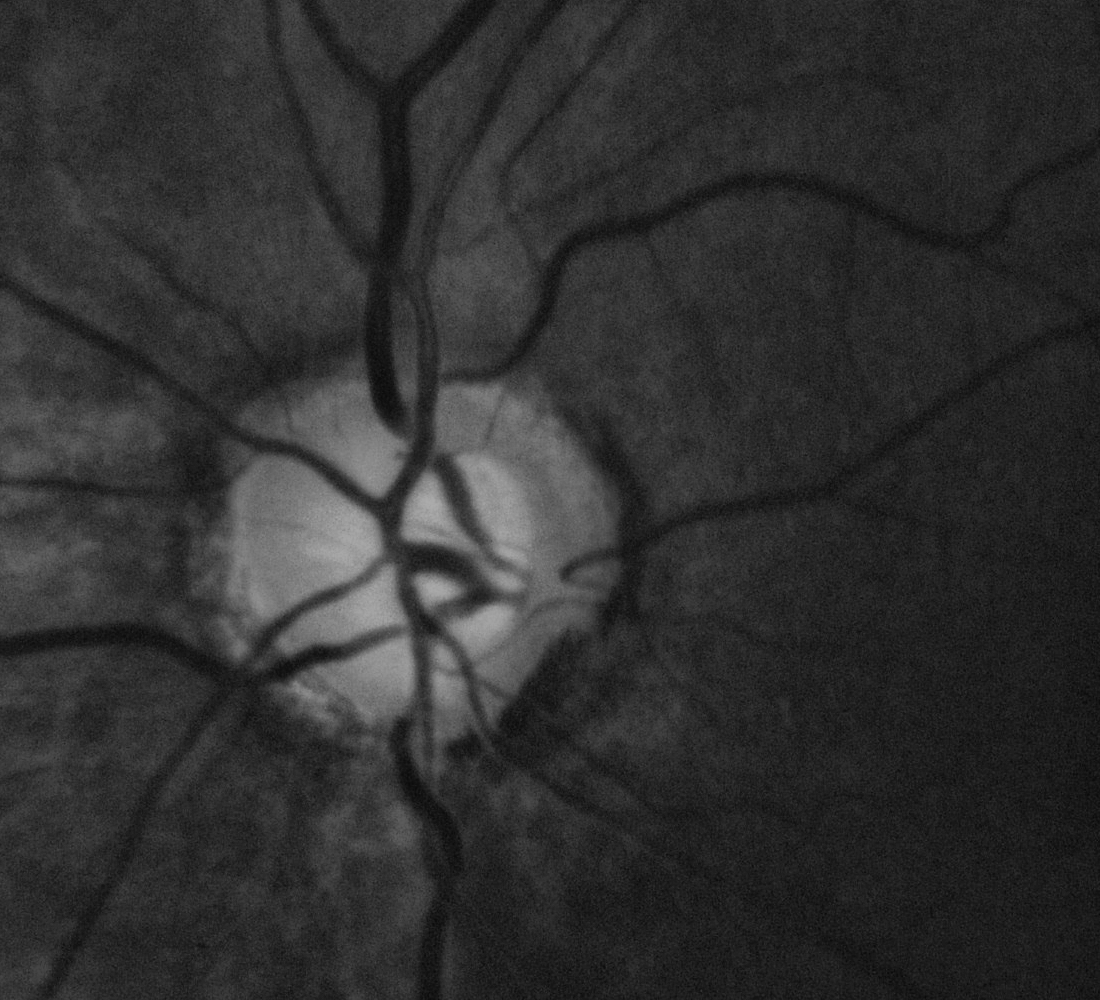


 
 CLAHE of RED Channeling


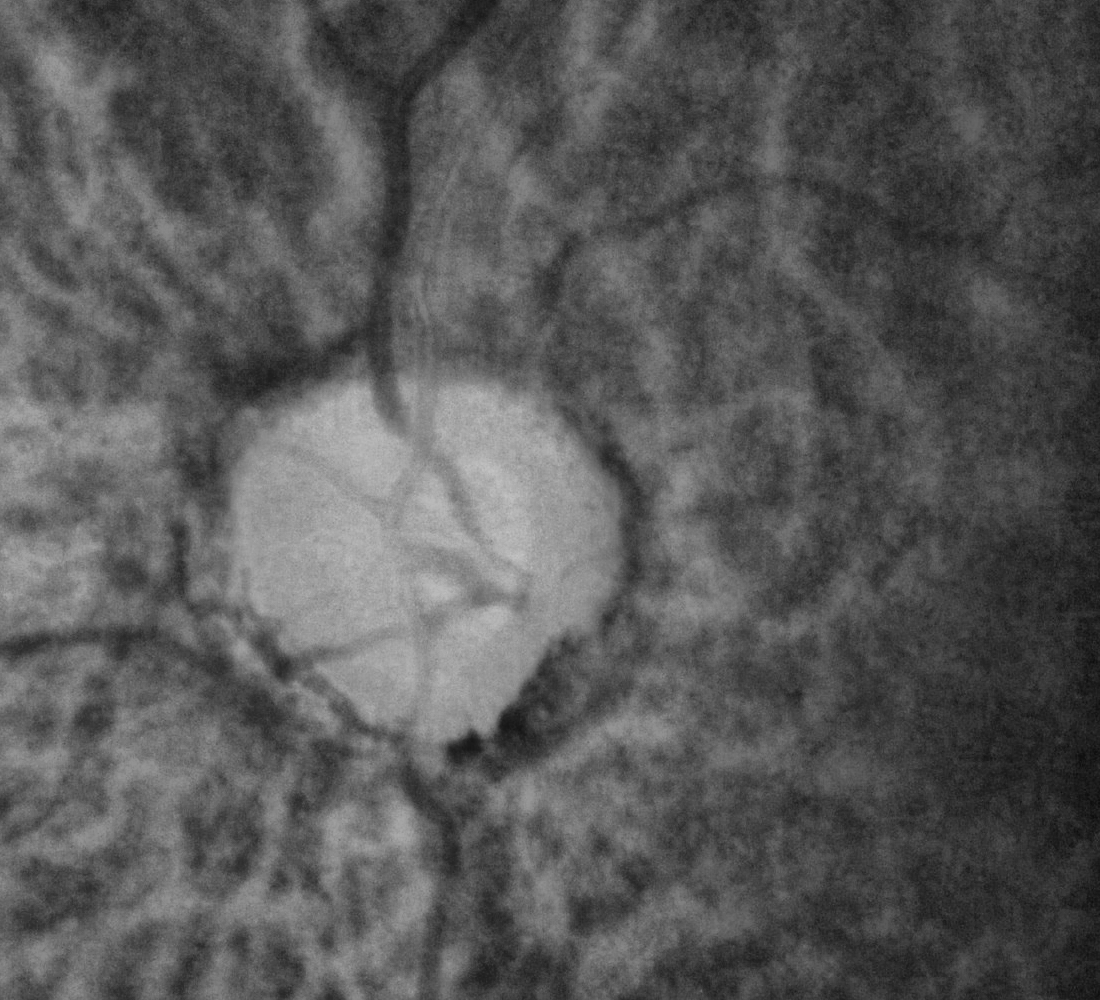


 
 Disk


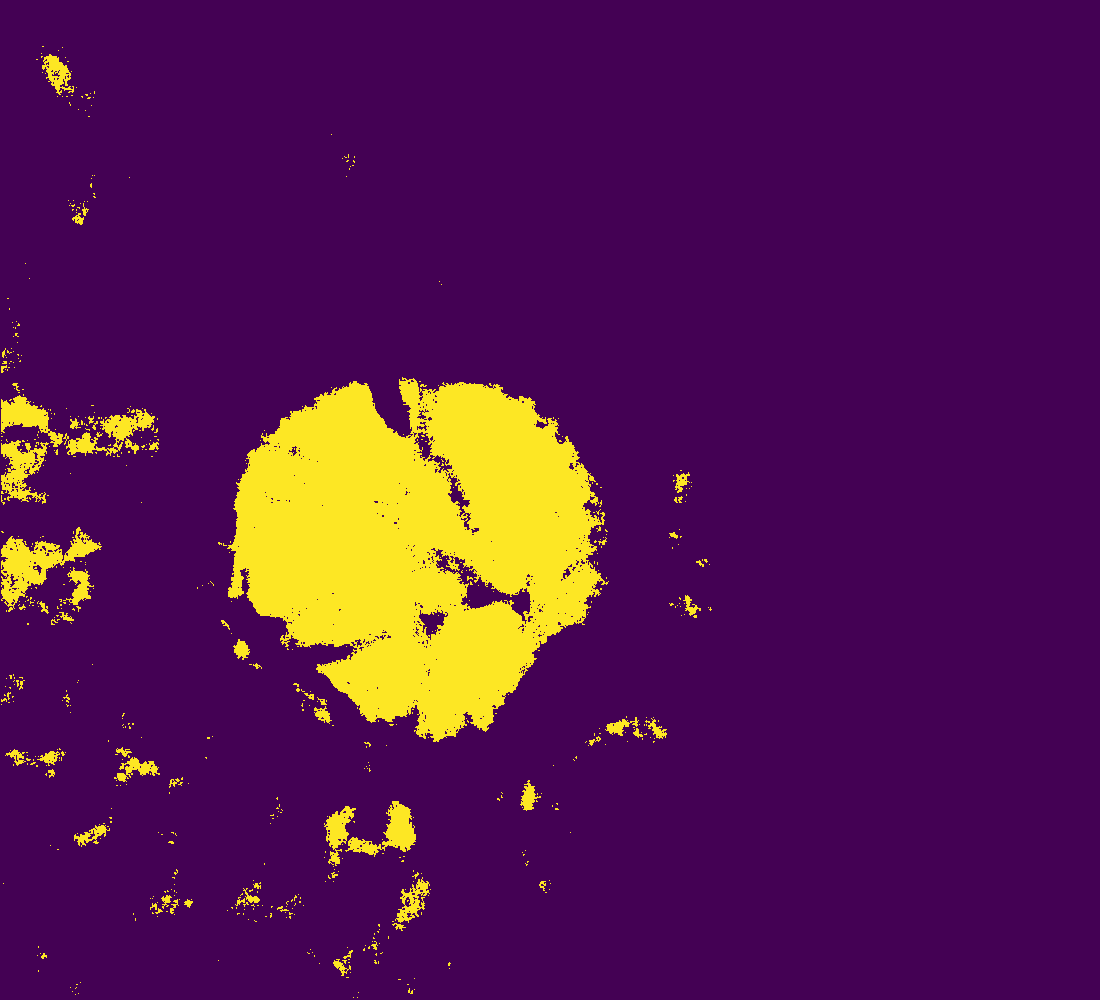


 
 Cup


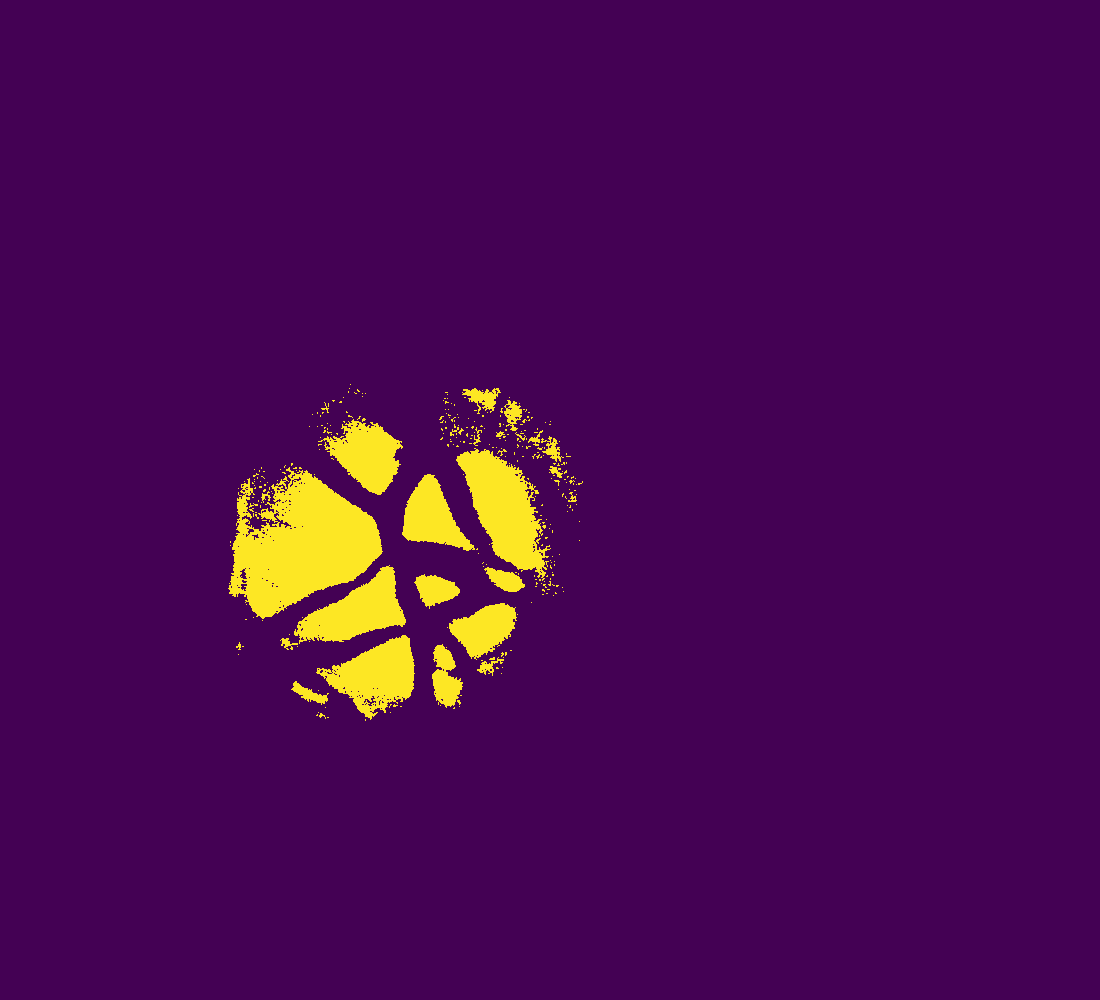


 
 morphology of cup


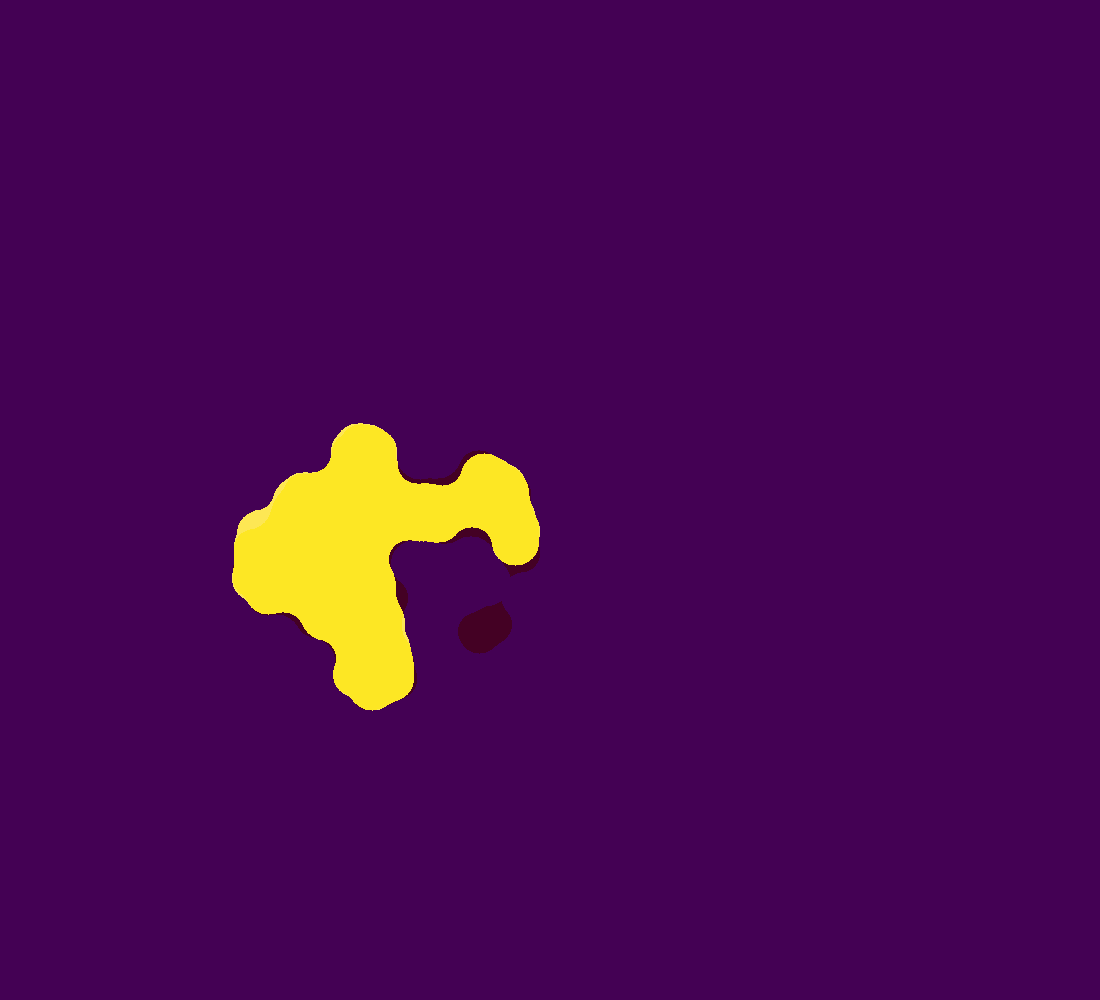


 
 Countour Of CUP


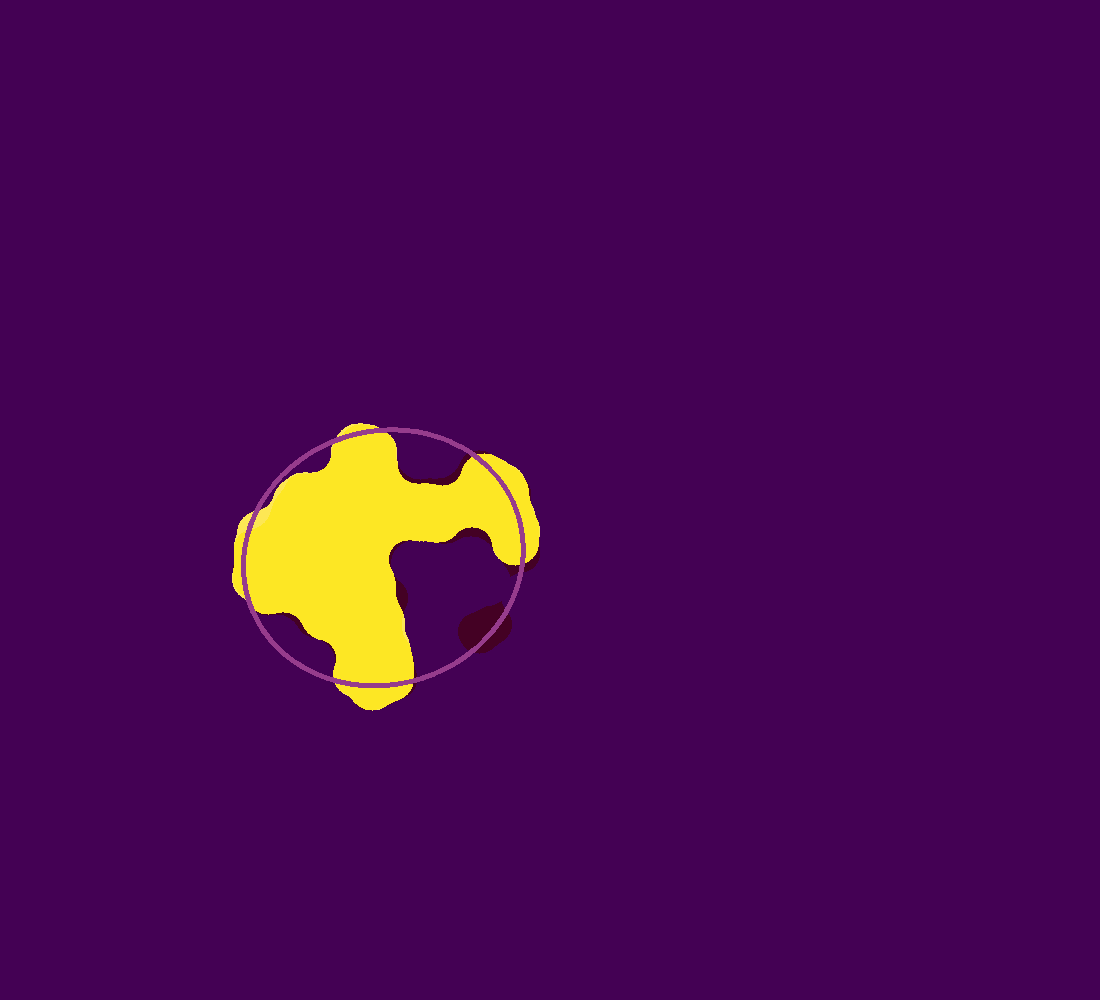


 
 morphology of disk


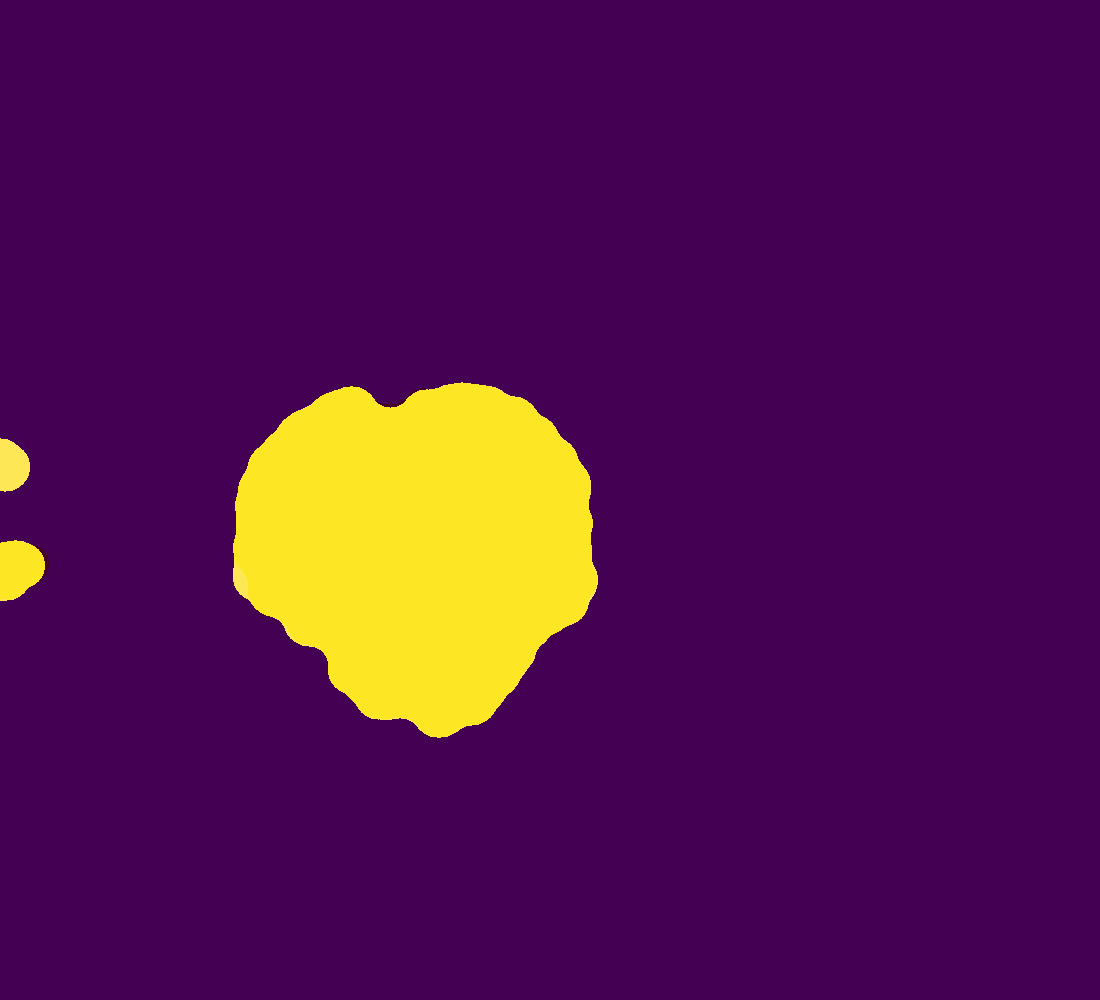


 
 cv2 threshold


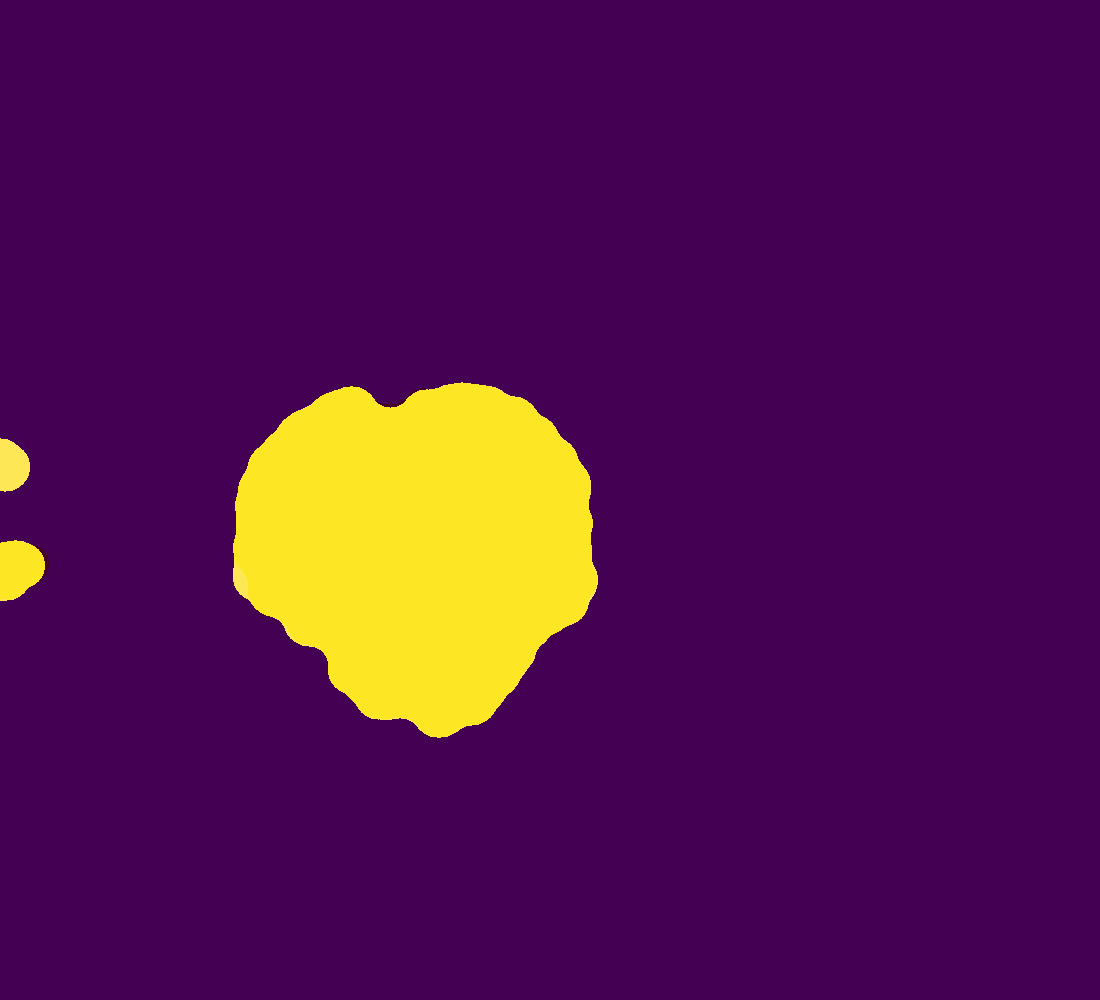


 
 Contours of disk


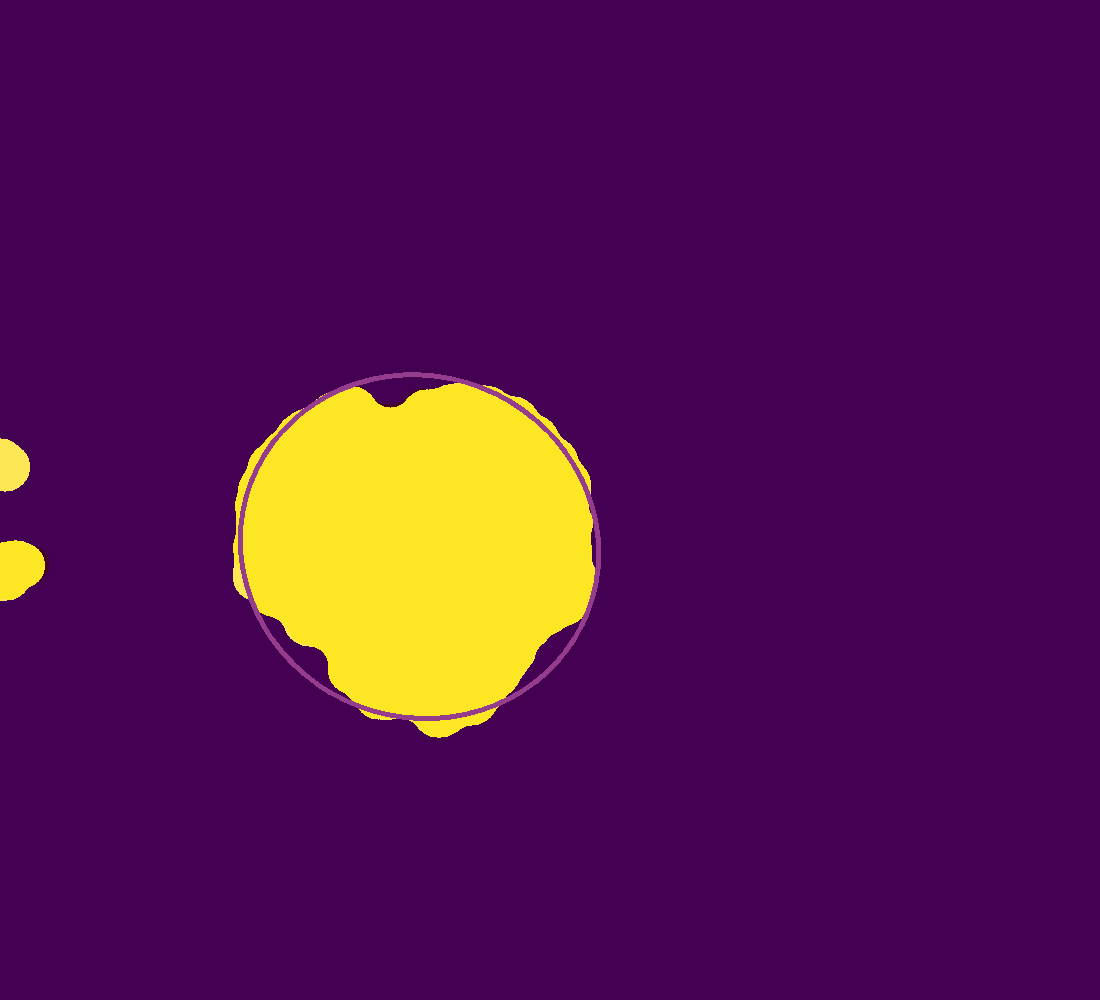


 CDR :  0.8438356164383561


In [ ]:
set_path = os.path.join('/content/drive/MyDrive/Drishti-GS1_files/Drishti-GS1_files/Drishti-GS1_files/Test/Images/drishtiGS_003.png')
image = cv2.imread(set_path,1)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(9,9))
segment(image)
cup = cv2.imread('/content/cup.png')
disk = cv2.imread('/content/disk.png')
CDR = cdr(cup,disk)
print('\n CDR : ',CDR)